<a href="https://colab.research.google.com/github/JessicaAero/Projeto_CD/blob/main/IntroCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROJETO - PARTE 1**



1.   Coletar dados


In [ ]:
import numpy as np
import pandas as pd
flights=pd.read_csv("https://raw.githubusercontent.com/JessicaAero/Intro-CD/main/flightdata_dataset_2019-CD-Proj.csv?token=GHSAT0AAAAAACUSFPZO2RIRIXBU7QBW6354ZUNSPFQ", encoding = "ISO-8859-1")
flights.head()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897.0,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662.0,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882.0,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218.0,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302.0,1,3,16,50,21,35,4,45


2.   Realizar pré-processamento dos dados




*   Definição de Tipos







In [ ]:
flights.dtypes


Airline            object
Source             object
Destination        object
Total_Stops         int64
Price             float64
Date                int64
Month               int64
Dep_hours           int64
Dep_min             int64
Arrival_hours       int64
Arrival_min         int64
Duration_hours      int64
Duration_min        int64
dtype: object

In [ ]:
flights['Airline'] = flights['Airline'].astype('category')
flights['Source'] = flights['Source'].astype('category')
flights['Destination'] = flights['Destination'].astype('category')


In [ ]:
flights.dtypes

Airline           category
Source            category
Destination       category
Total_Stops          int64
Price              float64
Date                 int64
Month                int64
Dep_hours            int64
Dep_min              int64
Arrival_hours        int64
Arrival_min          int64
Duration_hours       int64
Duration_min         int64
dtype: object

In [ ]:
flights['Airline'].cat.categories

Index(['Air Asia', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy'],
      dtype='object')

In [ ]:
flights['Airline'] = flights['Airline'].cat.codes
flights['Source'] = flights['Source'].cat.codes
flights['Destination'] = flights['Destination'].cat.codes


In [ ]:
flights.dtypes

Airline              int8
Source               int8
Destination          int8
Total_Stops         int64
Price             float64
Date                int64
Month               int64
Dep_hours           int64
Dep_min             int64
Arrival_hours       int64
Arrival_min         int64
Duration_hours      int64
Duration_min        int64
dtype: object

*   Tratamento de dados ausentes, normalização e desnormalização



In [ ]:
flights.shape


(10686, 13)

In [ ]:
print(flights.isnull().sum())

Airline            0
Source             0
Destination        0
Total_Stops        0
Price             53
Date               0
Month              0
Dep_hours          0
Dep_min            0
Arrival_hours      0
Arrival_min        0
Duration_hours     0
Duration_min       0
dtype: int64


In [ ]:
#remove colunas com ao menos 70% de dados ausentes
flights2 = flights.dropna(thresh=0.7*len(flights), axis=1)

flights2.head()




,Airline,Source,Destination,Total_Stops,Price,Date,Month,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
0,3,0,5,0,3897.0,24,3,22,20,1,10,2,50
1,1,3,0,2,7662.0,1,5,5,50,13,15,7,25
2,4,2,1,2,13882.0,9,6,9,25,4,25,19,0
3,3,3,0,1,6218.0,12,5,18,5,23,30,5,25
4,3,0,5,1,13302.0,1,3,16,50,21,35,4,45


In [ ]:
flights.shape

(10686, 13)

In [ ]:
print(flights2.isnull().sum())

Airline            0
Source             0
Destination        0
Total_Stops        0
Price             53
Date               0
Month              0
Dep_hours          0
Dep_min            0
Arrival_hours      0
Arrival_min        0
Duration_hours     0
Duration_min       0
dtype: int64


In [ ]:
print(flights2['Price'].mean())
print(flights2['Price'].median())

9085.989090567102
8372.0


In [ ]:
flights2['Price'].describe()

count    10633.000000
mean      9085.989091
std       4611.227929
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

In [ ]:
flights2.dtypes

Airline              int8
Source               int8
Destination          int8
Total_Stops         int64
Price             float64
Date                int64
Month               int64
Dep_hours           int64
Dep_min             int64
Arrival_hours       int64
Arrival_min         int64
Duration_hours      int64
Duration_min        int64
dtype: object

In [ ]:
flights2.head()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
0,3,0,5,0,3897.0,24,3,22,20,1,10,2,50
1,1,3,0,2,7662.0,1,5,5,50,13,15,7,25
2,4,2,1,2,13882.0,9,6,9,25,4,25,19,0
3,3,3,0,1,6218.0,12,5,18,5,23,30,5,25
4,3,0,5,1,13302.0,1,3,16,50,21,35,4,45


In [ ]:
flights_norm = (flights2 - flights2.min()) / (flights2.max() - flights2.min())
print(flights_norm.head())

    Airline  Source  Destination  Total_Stops     Price      Date     Month  \
0  0.272727    0.00          1.0         0.00  0.027497  0.884615  0.000000   
1  0.090909    0.75          0.0         0.50  0.075920  0.000000  0.666667   
2  0.363636    0.50          0.2         0.50  0.155917  0.307692  1.000000   
3  0.272727    0.75          0.0         0.25  0.057348  0.423077  0.666667   
4  0.272727    0.00          1.0         0.25  0.148457  0.000000  0.000000   

   Dep_hours   Dep_min  Arrival_hours  Arrival_min  Duration_hours  \
0   0.956522  0.363636       0.043478     0.181818        0.021739   
1   0.217391  0.909091       0.565217     0.272727        0.130435   
2   0.391304  0.454545       0.173913     0.454545        0.391304   
3   0.782609  0.090909       1.000000     0.545455        0.086957   
4   0.695652  0.909091       0.913043     0.636364        0.065217   

   Duration_min  
0      0.909091  
1      0.454545  
2      0.000000  
3      0.454545  
4      0.81818

In [ ]:
flights_norm.dtypes

Airline           float64
Source            float64
Destination       float64
Total_Stops       float64
Price             float64
Date              float64
Month             float64
Dep_hours         float64
Dep_min           float64
Arrival_hours     float64
Arrival_min       float64
Duration_hours    float64
Duration_min      float64
dtype: object

In [ ]:
print(flights_norm.isnull().sum())

Airline            0
Source             0
Destination        0
Total_Stops        0
Price             53
Date               0
Month              0
Dep_hours          0
Dep_min            0
Arrival_hours      0
Arrival_min        0
Duration_hours     0
Duration_min       0
dtype: int64


In [ ]:
pip install fancyimpute

In [ ]:
from fancyimpute import KNN
flightsnorm_knn = KNN(k=3).fit_transform(flights_norm)

Imputing row 1/10686 with 0 missing, elapsed time: 26.171
Imputing row 101/10686 with 0 missing, elapsed time: 26.173
Imputing row 201/10686 with 0 missing, elapsed time: 26.174
Imputing row 301/10686 with 0 missing, elapsed time: 26.176
Imputing row 401/10686 with 0 missing, elapsed time: 26.177
Imputing row 501/10686 with 0 missing, elapsed time: 26.178
Imputing row 601/10686 with 0 missing, elapsed time: 26.179
Imputing row 701/10686 with 0 missing, elapsed time: 26.180
Imputing row 801/10686 with 0 missing, elapsed time: 26.181
Imputing row 901/10686 with 0 missing, elapsed time: 26.182
Imputing row 1001/10686 with 0 missing, elapsed time: 26.183
Imputing row 1101/10686 with 0 missing, elapsed time: 26.184
Imputing row 1201/10686 with 0 missing, elapsed time: 26.185
Imputing row 1301/10686 with 0 missing, elapsed time: 26.186
Imputing row 1401/10686 with 0 missing, elapsed time: 26.187
Imputing row 1501/10686 with 0 missing, elapsed time: 26.188
Imputing row 1601/10686 with 0 missi

In [ ]:
flightsnorm_knn.shape

(10686, 13)

In [ ]:
flights3 = pd.DataFrame(data=flightsnorm_knn[0:,0:],columns=['Airline', 'Source', 'Destination', 'Total_Stops', 'Price', 'Date', 'Month', 'Dep_hours', 'Dep_min', 'Arrival_hours', 'Arrival_min', 'Duration_hours', 'Duration_min'])

In [ ]:
flights3.head()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
0,0.272727,0.00,1.0,0.00,0.027497,0.884615,0.000000,0.956522,0.363636,0.043478,0.181818,0.021739,0.909091
1,0.090909,0.75,0.0,0.50,0.075920,0.000000,0.666667,0.217391,0.909091,0.565217,0.272727,0.130435,0.454545
2,0.363636,0.50,0.2,0.50,0.155917,0.307692,1.000000,0.391304,0.454545,0.173913,0.454545,0.391304,0.000000
3,0.272727,0.75,0.0,0.25,0.057348,0.423077,0.666667,0.782609,0.090909,1.000000,0.545455,0.086957,0.454545
4,0.272727,0.00,1.0,0.25,0.148457,0.000000,0.000000,0.695652,0.909091,0.913043,0.636364,0.065217,0.818182


In [ ]:
print(flights3.isnull().sum())

Airline           0
Source            0
Destination       0
Total_Stops       0
Price             0
Date              0
Month             0
Dep_hours         0
Dep_min           0
Arrival_hours     0
Arrival_min       0
Duration_hours    0
Duration_min      0
dtype: int64


In [ ]:
flights3.dtypes

Airline           float64
Source            float64
Destination       float64
Total_Stops       float64
Price             float64
Date              float64
Month             float64
Dep_hours         float64
Dep_min           float64
Arrival_hours     float64
Arrival_min       float64
Duration_hours    float64
Duration_min      float64
dtype: object

In [ ]:
flights_min = flights2.min()
flights_max = flights2.max()
flights_filled = flights3 * (flights_max - flights_min) + flights_min

In [ ]:
flights_filled.head()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
0,3.0,0.0,5.0,0.0,3897.0,24.0,3.0,22.0,20.0,1.0,10.0,2.0,50.0
1,1.0,3.0,0.0,2.0,7662.0,1.0,5.0,5.0,50.0,13.0,15.0,7.0,25.0
2,4.0,2.0,1.0,2.0,13882.0,9.0,6.0,9.0,25.0,4.0,25.0,19.0,0.0
3,3.0,3.0,0.0,1.0,6218.0,12.0,5.0,18.0,5.0,23.0,30.0,5.0,25.0
4,3.0,0.0,5.0,1.0,13302.0,1.0,3.0,16.0,50.0,21.0,35.0,4.0,45.0


In [ ]:
flights_filled.dtypes

Airline           float64
Source            float64
Destination       float64
Total_Stops       float64
Price             float64
Date              float64
Month             float64
Dep_hours         float64
Dep_min           float64
Arrival_hours     float64
Arrival_min       float64
Duration_hours    float64
Duration_min      float64
dtype: object

*   Discretização

In [ ]:
# discretizando com 4 bins com mesmo intervalo (quantiles)
flights_filled['Price_dist'] = pd.qcut(flights_filled['Price'],4)


flights_filled['Price'].describe()


flights_filled['Price_dist'].value_counts()

Price_dist
(1758.999, 5277.0]    2693
(5277.0, 8372.0]      2675
(8372.0, 12373.0]     2675
(12373.0, 79512.0]    2643
Name: count, dtype: int64

In [ ]:
# discretizando com 10 bins com mesmo intervalo
#flights_filled['Price_dist2'] = pd.cut(flights_filled['Price'],10)


#flights_filled['Price_dist2'].value_counts()


#flights_filled['Price'].describe()

*   Limpeza de Dados


In [ ]:
flights_filled[flights_filled.duplicated()].sort_values("Airline").head()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min,Price_dist
8733,0.0,0.0,5.0,0.0,4482.0,24.0,3.0,23.0,25.0,2.0,10.0,2.0,45.0,"(1758.999, 5277.0]"
4571,1.0,2.0,1.0,2.0,12970.0,1.0,6.0,17.0,15.0,19.0,15.0,26.0,0.0,"(12373.0, 79512.0]"
10227,1.0,3.0,0.0,2.0,12324.0,21.0,5.0,16.0,50.0,5.0,35.0,12.0,45.0,"(8372.0, 12373.0]"
9484,1.0,2.0,1.0,3.0,9128.0,21.0,3.0,5.0,15.0,19.0,15.0,38.0,0.0,"(8372.0, 12373.0]"
6658,1.0,2.0,1.0,2.0,9181.0,24.0,6.0,22.0,0.0,19.0,15.0,21.0,15.0,"(8372.0, 12373.0]"


In [ ]:
len(flights_filled)

10686

In [ ]:
#Removendo as linhas duplicadas, assumindo que uma mesma companhia aérea não tenha 2 voo iguais num mesmo horário
flights_filled.drop_duplicates(keep = False, inplace = True)
print(len(flights_filled))

10266


In [ ]:
#Detecção de outlier: utilizar Tukey para facilitar na segregação dos valores muito acima e muito abaixo
flights_filled['Price'].describe()

count    10266.000000
mean      8975.736837
std       4634.769062
min       1759.000000
25%       5198.000000
50%       8073.000000
75%      12273.000000
max      79512.000000
Name: Price, dtype: float64

<Axes: >

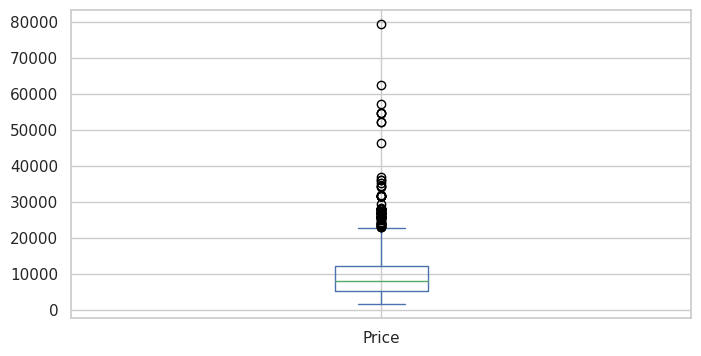

In [ ]:
flights_filled['Price'].plot.box()

<Axes: >

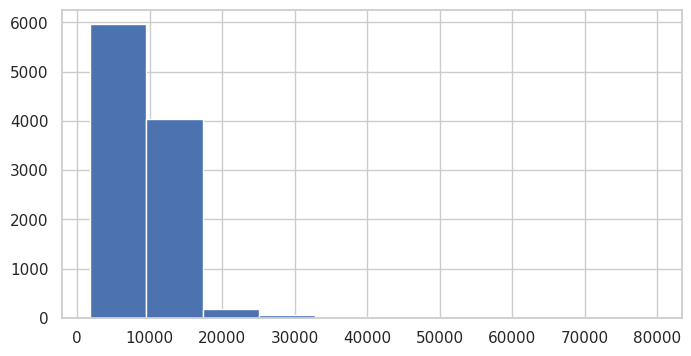

In [ ]:
flights_filled['Price'].hist()

<Axes: >

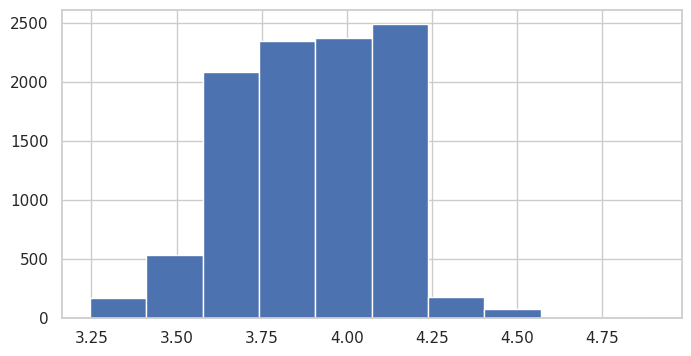

In [ ]:
flights_filled['Price_log'] = np.log10(flights_filled['Price'])
flights_filled['Price_log'].hist()

In [ ]:
flights_filled.shape

(10266, 15)

In [ ]:

q1 = flights_filled['Price_log'].quantile(q=0.25)
q3 = flights_filled['Price_log'].quantile(q=0.75)
iqr = q3 - q1
print(iqr)


0.3731144590530424


In [ ]:
#Outliers abaixo
len(flights_filled[flights_filled['Price_log'] < (q1-1.5*iqr)])

0

In [ ]:
len(flights_filled[flights_filled['Price_log'] > (q3+1.5*iqr)])

9

In [ ]:
flights_filled[flights_filled['Price_log'] > (q3+1.5*iqr)].sort_values("Price_log").head(9)

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min,Price_dist,Price_log
7351,5.0,2.0,1.0,2.0,46490.0,3.0,3.0,20.0,5.0,4.0,25.0,8.0,20.0,"(12373.0, 79512.0]",4.667360
657,5.0,0.0,5.0,1.0,52229.0,1.0,3.0,5.0,45.0,10.0,45.0,5.0,0.0,"(12373.0, 79512.0]",4.717912
9715,5.0,2.0,1.0,2.0,52285.0,6.0,3.0,20.0,5.0,4.0,25.0,8.0,20.0,"(12373.0, 79512.0]",4.718377
1478,4.0,0.0,5.0,1.0,54826.0,18.0,3.0,18.0,40.0,0.0,45.0,6.0,5.0,"(12373.0, 79512.0]",4.738987
2618,4.0,0.0,5.0,1.0,54826.0,18.0,3.0,22.0,50.0,5.0,5.0,6.0,15.0,"(12373.0, 79512.0]",4.738987
5439,4.0,0.0,5.0,1.0,54826.0,1.0,3.0,16.0,55.0,23.0,0.0,6.0,5.0,"(12373.0, 79512.0]",4.738987
10364,5.0,0.0,5.0,1.0,57209.0,1.0,3.0,9.0,45.0,14.0,25.0,4.0,40.0,"(12373.0, 79512.0]",4.757464
5372,5.0,0.0,5.0,1.0,62427.0,1.0,3.0,5.0,45.0,12.0,25.0,6.0,40.0,"(12373.0, 79512.0]",4.795372
2924,5.0,0.0,5.0,1.0,79512.0,1.0,3.0,5.0,45.0,11.0,25.0,5.0,40.0,"(12373.0, 79512.0]",4.900433


In [ ]:
#Assumindo 40000 como o máximo preço aceitável
flights_filled = flights_filled[flights_filled['Price'] < 40000]

In [ ]:
#O filtro eliminou as passagens com preço acima de 64000
len(flights_filled)

10257

In [ ]:
flights_filled['DurationTotalHours'] = (flights_filled['Duration_hours']) + (flights_filled['Duration_min']/60)


In [ ]:
flights_filled.head()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min,Price_dist,Price_log,DurationTotalHours
0,3.0,0.0,5.0,0.0,3897.0,24.0,3.0,22.0,20.0,1.0,10.0,2.0,50.0,"(1758.999, 5277.0]",3.590730,2.833333
1,1.0,3.0,0.0,2.0,7662.0,1.0,5.0,5.0,50.0,13.0,15.0,7.0,25.0,"(5277.0, 8372.0]",3.884342,7.416667
2,4.0,2.0,1.0,2.0,13882.0,9.0,6.0,9.0,25.0,4.0,25.0,19.0,0.0,"(12373.0, 79512.0]",4.142452,19.000000
3,3.0,3.0,0.0,1.0,6218.0,12.0,5.0,18.0,5.0,23.0,30.0,5.0,25.0,"(5277.0, 8372.0]",3.793651,5.416667
4,3.0,0.0,5.0,1.0,13302.0,1.0,3.0,16.0,50.0,21.0,35.0,4.0,45.0,"(12373.0, 79512.0]",4.123917,4.750000


<Axes: xlabel='DurationTotalHours', ylabel='Price'>

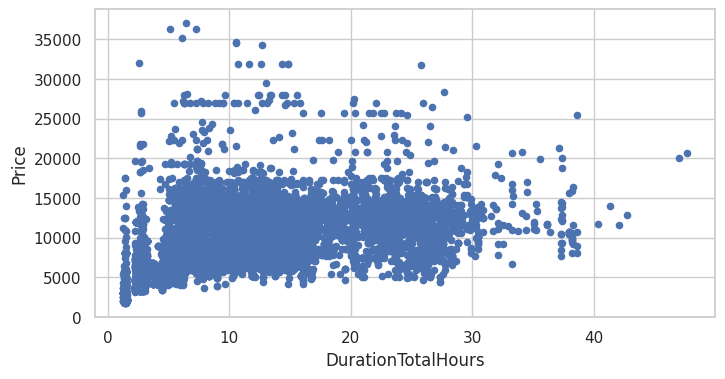

In [ ]:
#Utilização da razão de duas variáveis para visualização e entendimento dos outliers
flights_filled.plot.scatter(x='DurationTotalHours',y='Price')

In [ ]:
flights_filled.dtypes

Airline                float64
Source                 float64
Destination            float64
Total_Stops            float64
Price                  float64
Date                   float64
Month                  float64
Dep_hours              float64
Dep_min                float64
Arrival_hours          float64
Arrival_min            float64
Duration_hours         float64
Duration_min           float64
Price_dist            category
Price_log              float64
DurationTotalHours     float64
dtype: object

In [ ]:
flights_filled['PricePerHour'] = flights_filled['Price'] / flights_filled['DurationTotalHours']

In [ ]:
flights_filled.head()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min,Price_dist,Price_log,DurationTotalHours,PricePerHour
0,3.0,0.0,5.0,0.0,3897.0,24.0,3.0,22.0,20.0,1.0,10.0,2.0,50.0,"(1758.999, 5277.0]",3.590730,2.833333,1375.411765
1,1.0,3.0,0.0,2.0,7662.0,1.0,5.0,5.0,50.0,13.0,15.0,7.0,25.0,"(5277.0, 8372.0]",3.884342,7.416667,1033.078652
2,4.0,2.0,1.0,2.0,13882.0,9.0,6.0,9.0,25.0,4.0,25.0,19.0,0.0,"(12373.0, 79512.0]",4.142452,19.000000,730.631579
3,3.0,3.0,0.0,1.0,6218.0,12.0,5.0,18.0,5.0,23.0,30.0,5.0,25.0,"(5277.0, 8372.0]",3.793651,5.416667,1147.938462
4,3.0,0.0,5.0,1.0,13302.0,1.0,3.0,16.0,50.0,21.0,35.0,4.0,45.0,"(12373.0, 79512.0]",4.123917,4.750000,2800.421053


In [ ]:
flights_filled['PricePerHour'].describe()

count    10257.000000
mean      1335.749581
std        900.926548
min        164.158537
25%        665.643243
50%       1196.556522
75%       1710.333333
max      12365.806452
Name: PricePerHour, dtype: float64

<Axes: >

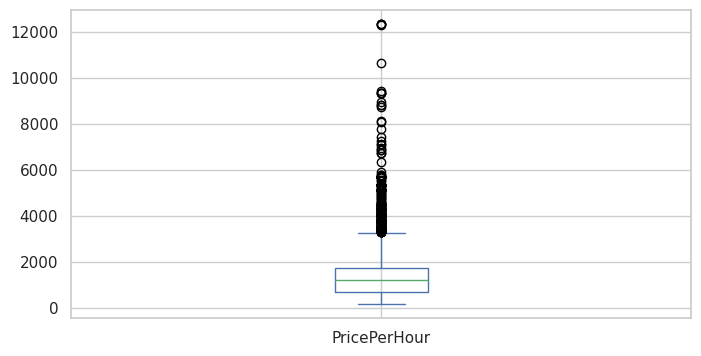

In [ ]:
flights_filled['PricePerHour'].plot.box()

<Axes: >

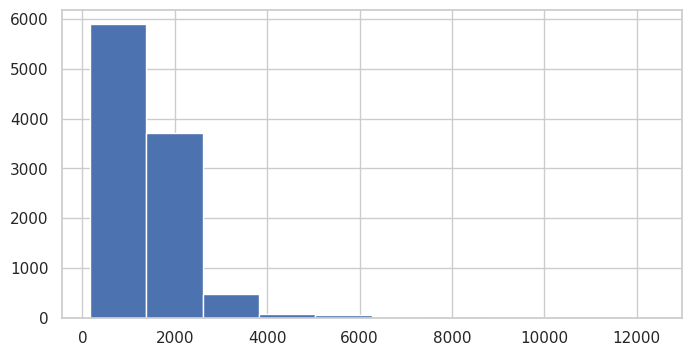

In [ ]:
flights_filled['PricePerHour'].hist()

<Axes: >

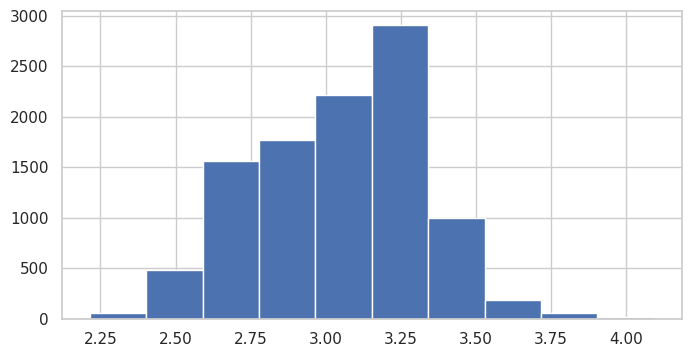

In [ ]:
flights_filled['PricePerHour_log'] = np.log10(flights_filled['PricePerHour'])

flights_filled['PricePerHour_log'].hist()

In [ ]:
#zscore robusto
mad = abs(flights_filled['PricePerHour_log'] - flights_filled['PricePerHour_log'].median()).median()*(1/0.6745)
print(mad)

0.28389819531837873


<Axes: >

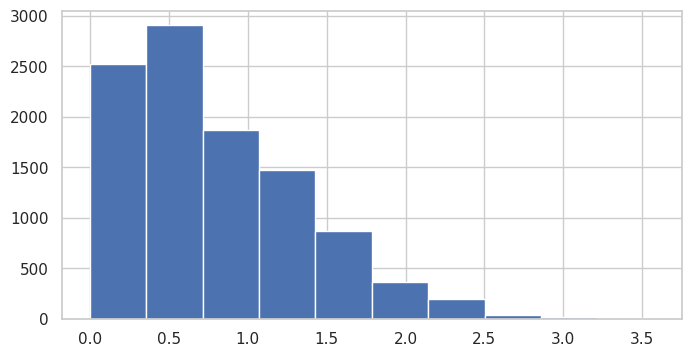

In [ ]:
(abs(flights_filled['PricePerHour_log']-flights_filled['PricePerHour_log'].median())/mad).hist()

In [ ]:
len(flights_filled[abs(flights_filled['PricePerHour_log']-flights_filled['PricePerHour_log'].median())/mad > 3.5])

4

In [ ]:
flights_filled[abs(flights_filled['PricePerHour_log']-flights_filled['PricePerHour_log'].median())/mad > 3.5].sort_values("PricePerHour_log").head(4)

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min,Price_dist,Price_log,DurationTotalHours,PricePerHour,PricePerHour_log
7392,1.0,4.0,3.0,0.0,15385.0,1.0,3.0,19.0,30.0,20.0,45.0,1.0,15.0,"(12373.0, 79512.0]",4.187098,1.250000,12308.000000,4.090187
1942,4.0,4.0,3.0,0.0,17501.0,1.0,3.0,7.0,10.0,8.0,35.0,1.0,25.0,"(12373.0, 79512.0]",4.243063,1.416667,12353.647059,4.091795
4284,3.0,4.0,3.0,0.0,17501.0,1.0,3.0,6.0,20.0,7.0,45.0,1.0,25.0,"(12373.0, 79512.0]",4.243063,1.416667,12353.647059,4.091795
10052,1.0,3.0,0.0,0.0,31945.0,24.0,3.0,20.0,45.0,23.0,20.0,2.0,35.0,"(12373.0, 79512.0]",4.504403,2.583333,12365.806452,4.092222


In [ ]:
len (flights_filled[abs(flights_filled['PricePerHour_log']-flights_filled['PricePerHour_log'].median())/mad <= 3.5])

10253

In [ ]:
flights_filled = flights_filled[abs(flights_filled['PricePerHour_log']-flights_filled['PricePerHour_log'].median())/mad <= 3.5]
len(flights_filled)


10253


3. Apresentar estatísticas descritivas dos dados com visualizações.

In [ ]:
flights_filled.shape

(10253, 18)

In [ ]:
flights_filled['DurationTotalHours'].describe()

count    10253.000000
mean        10.314940
std          8.239246
min          1.250000
25%          2.833333
50%          8.250000
75%         14.916667
max         47.666667
Name: DurationTotalHours, dtype: float64

<Axes: >

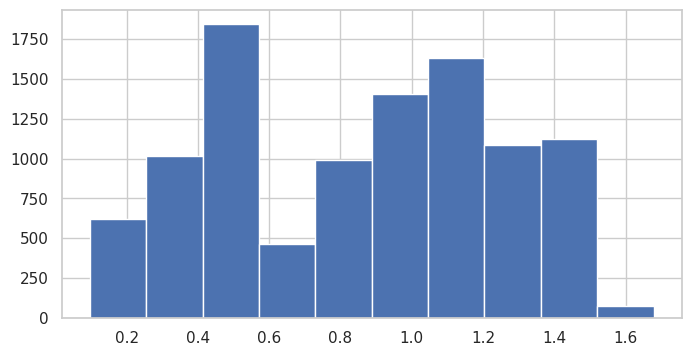

In [ ]:
flights_filled['log_Duration'] = flights_filled['DurationTotalHours'].apply(np.log10)
flights_filled[flights_filled['log_Duration'] > 0]['log_Duration'].hist()

In [ ]:
# Adicionando coluna para domestico e internacional
flights_filled['FlightType'] = 'International'
flights_filled.loc[(flights_filled['DurationTotalHours'] > 0) & (flights_filled['DurationTotalHours'] < 3),'FlightType'] = 'Domestic'
flights_filled = flights_filled.drop(['log_Duration'], axis=1)
flights_filled.head()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min,Price_dist,Price_log,DurationTotalHours,PricePerHour,PricePerHour_log,FlightType
0,3.0,0.0,5.0,0.0,3897.0,24.0,3.0,22.0,20.0,1.0,10.0,2.0,50.0,"(1758.999, 5277.0]",3.590730,2.833333,1375.411765,3.138433,Domestic
1,1.0,3.0,0.0,2.0,7662.0,1.0,5.0,5.0,50.0,13.0,15.0,7.0,25.0,"(5277.0, 8372.0]",3.884342,7.416667,1033.078652,3.014133,International
2,4.0,2.0,1.0,2.0,13882.0,9.0,6.0,9.0,25.0,4.0,25.0,19.0,0.0,"(12373.0, 79512.0]",4.142452,19.000000,730.631579,2.863698,International
3,3.0,3.0,0.0,1.0,6218.0,12.0,5.0,18.0,5.0,23.0,30.0,5.0,25.0,"(5277.0, 8372.0]",3.793651,5.416667,1147.938462,3.059919,International
4,3.0,0.0,5.0,1.0,13302.0,1.0,3.0,16.0,50.0,21.0,35.0,4.0,45.0,"(12373.0, 79512.0]",4.123917,4.750000,2800.421053,3.447223,International


In [ ]:
flights_filled[flights_filled['FlightType'] == 'International']['DurationTotalHours'].describe()

count    7268.000000
mean       13.562305
std         7.709211
min         3.000000
25%         7.500000
50%        12.000000
75%        18.750000
max        47.666667
Name: DurationTotalHours, dtype: float64

In [ ]:
flights_filled[flights_filled['FlightType'] == 'Domestic']['DurationTotalHours'].describe()

count    2985.000000
mean        2.408124
std         0.520293
min         1.250000
25%         2.250000
50%         2.583333
75%         2.833333
max         2.916667
Name: DurationTotalHours, dtype: float64

In [ ]:
flights_filled[flights_filled['FlightType'] == 'International']['Price'].describe()

count     7268.000000
mean     10625.535666
std       3965.698466
min       3359.000000
25%       7452.000000
50%      10262.000000
75%      13377.000000
max      36983.000000
Name: Price, dtype: float64

In [ ]:
flights_filled[flights_filled['FlightType'] == 'Domestic']['Price'].describe()

count     2985.000000
mean      4797.842260
std       2005.235151
min       1759.000000
25%       3841.000000
50%       4423.000000
75%       5277.000000
max      25913.000000
Name: Price, dtype: float64

<Axes: >

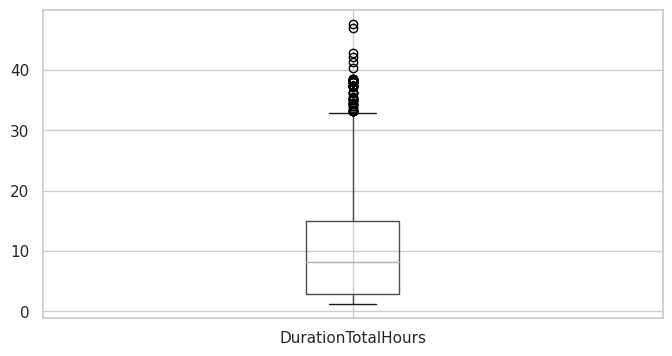

In [ ]:
flights_filled.boxplot(column=['DurationTotalHours'])

In [ ]:
flights_filled.head()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min,Price_dist,Price_log,DurationTotalHours,PricePerHour,PricePerHour_log,FlightType
0,3.0,0.0,5.0,0.0,3897.0,24.0,3.0,22.0,20.0,1.0,10.0,2.0,50.0,"(1758.999, 5277.0]",3.590730,2.833333,1375.411765,3.138433,Domestic
1,1.0,3.0,0.0,2.0,7662.0,1.0,5.0,5.0,50.0,13.0,15.0,7.0,25.0,"(5277.0, 8372.0]",3.884342,7.416667,1033.078652,3.014133,International
2,4.0,2.0,1.0,2.0,13882.0,9.0,6.0,9.0,25.0,4.0,25.0,19.0,0.0,"(12373.0, 79512.0]",4.142452,19.000000,730.631579,2.863698,International
3,3.0,3.0,0.0,1.0,6218.0,12.0,5.0,18.0,5.0,23.0,30.0,5.0,25.0,"(5277.0, 8372.0]",3.793651,5.416667,1147.938462,3.059919,International
4,3.0,0.0,5.0,1.0,13302.0,1.0,3.0,16.0,50.0,21.0,35.0,4.0,45.0,"(12373.0, 79512.0]",4.123917,4.750000,2800.421053,3.447223,International


In [ ]:
#Preço médio por hora dos voos de menos de 8 horas com no máximo 1 parada:
flights_filled[(flights_filled.FlightType == 'International') & (flights_filled.Total_Stops == 1) & (flights_filled.DurationTotalHours < 8)].PricePerHour.mean()

1552.8296816367144

In [ ]:
#Preço médio por hora considerando apenas as rotas internacionais e agrupado por Airline
flights_filled[flights_filled['FlightType']=='International'].groupby(['Airline'])['PricePerHour'].mean()

Airline
0.0      885.697129
1.0      721.167946
2.0     1068.016803
3.0     1097.229576
4.0     1120.191861
6.0     1118.274012
7.0     1231.274771
8.0     1166.013292
9.0     1273.846154
10.0     838.543992
Name: PricePerHour, dtype: float64

<Axes: xlabel='Total_Stops', ylabel='Price'>

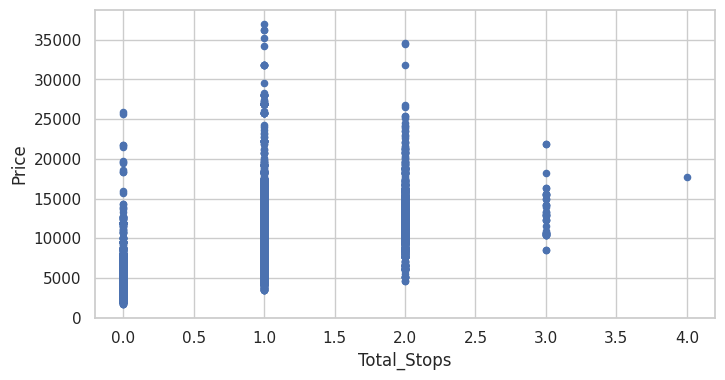

In [ ]:
#Estatísticas Bivariadas
flights_filled.plot.scatter(x='Total_Stops',y='Price')

<Axes: xlabel='Total_Stops', ylabel='DurationTotalHours'>

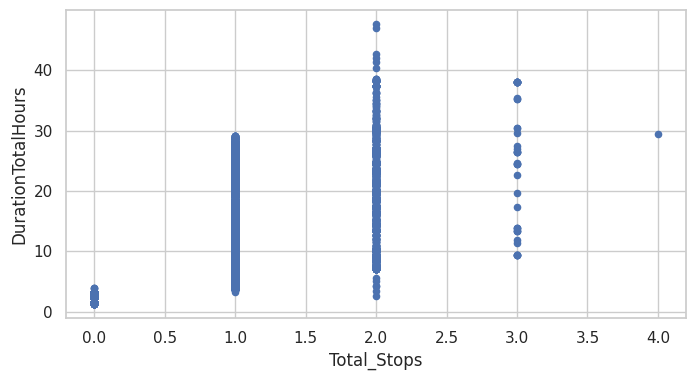

In [ ]:
flights_filled.plot.scatter(x='Total_Stops',y='DurationTotalHours')

<Axes: xlabel='DurationTotalHours', ylabel='Price'>

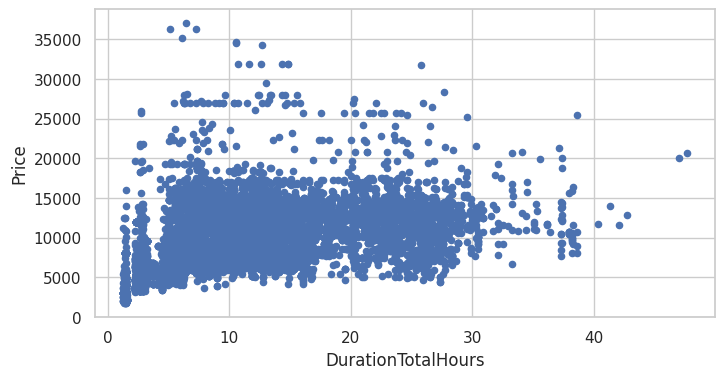

In [ ]:
flights_filled.plot.scatter(x='DurationTotalHours',y='Price')

4. Testes de Hipóteses


<Axes: xlabel='FlightType', ylabel='PricePerHour'>

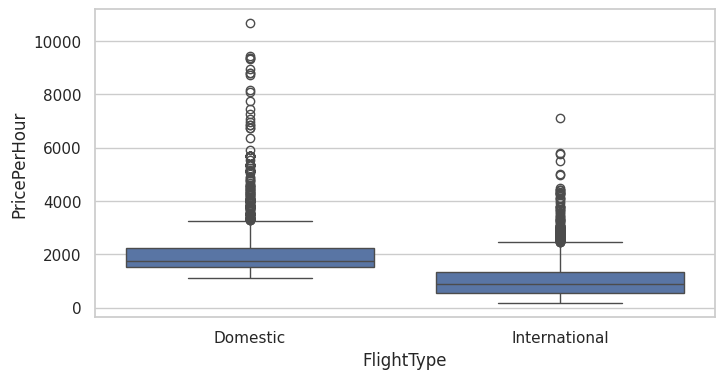

In [ ]:
import seaborn as sns
data1 = flights_filled[flights_filled['FlightType'] == 'Domestic']['PricePerHour']
data2 = flights_filled[flights_filled['FlightType'] == 'International']['PricePerHour']
#sns.boxplot(data = [data1, data2])
sns.boxplot(x='FlightType',y='PricePerHour',data=flights_filled)

<Axes: xlabel='PricePerHour', ylabel='Count'>

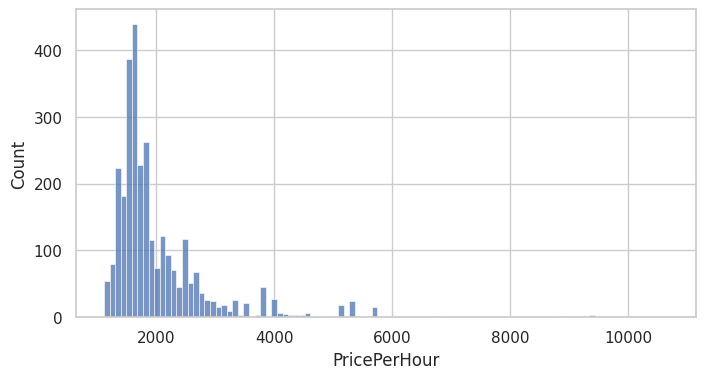

In [ ]:
sns.histplot(data1)

<Axes: xlabel='PricePerHour', ylabel='Count'>

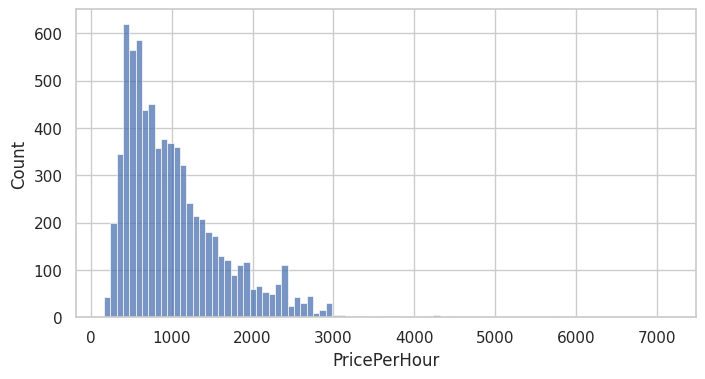

In [ ]:
sns.histplot(data2)

In [ ]:
#Grupo não pareado
#Rodar shapiro para verificar se as distribuições são paramétricas
from scipy import stats
stats.shapiro(flights_filled[flights_filled.FlightType == 'Domestic']['PricePerHour'])


ShapiroResult(statistic=0.6776738166809082, pvalue=0.0)

In [ ]:
stats.shapiro(flights_filled[flights_filled.FlightType == 'International']['PricePerHour'])

ShapiroResult(statistic=0.8743752241134644, pvalue=0.0)

In [ ]:
#Como não segue distribuição normal, mannwhitney será adotado
stats.mannwhitneyu(flights_filled[flights_filled.FlightType == 'Domestic']['PricePerHour'],flights_filled[flights_filled.FlightType == 'International']['PricePerHour'])

MannwhitneyuResult(statistic=18985775.0, pvalue=0.0)

<Axes: xlabel='FlightType', ylabel='PricePerHour'>

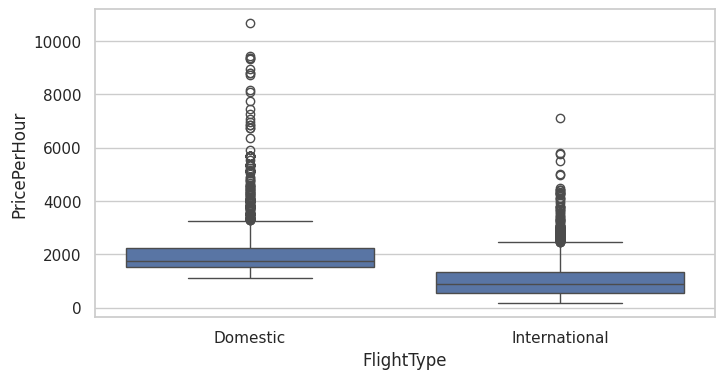

In [ ]:
#A conclusçao é de que existe diferença siginificativa entre perço por hora de voo doméstico e voo internacional
sns.boxplot(x='FlightType',y='PricePerHour',data=flights_filled)

In [ ]:
#Mesma análise, considerando duas Airlines que possuam um grande número de voos nos dados
flights_filled.groupby('Airline')['Airline'].count()

Airline
0.0      317
1.0     1643
2.0      194
3.0     2034
4.0     3567
6.0     1196
7.0       13
8.0      810
9.0        1
10.0     475
11.0       3
Name: Airline, dtype: int64

<Axes: xlabel='Airline', ylabel='PricePerHour'>

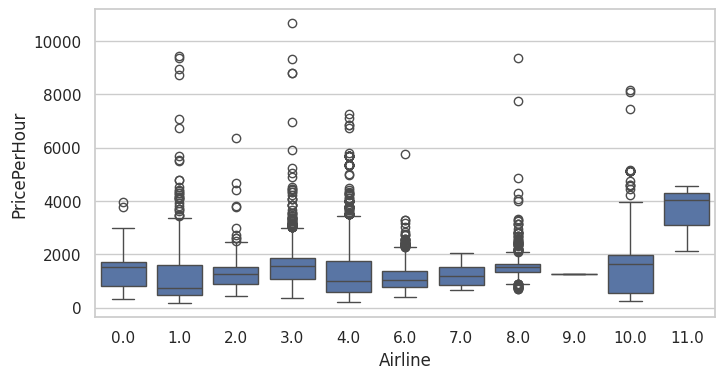

In [ ]:
#Airline 3 (Indigo) e Airline 4 (Jet Airways) são as que possuem maior número de voos
stats.mannwhitneyu(flights_filled[flights_filled['Airline'] == 3]['PricePerHour'],flights_filled[flights_filled['Airline'] == 4]['PricePerHour'])
sns.boxplot(x='Airline',y='PricePerHour',data=flights_filled)

<Axes: xlabel='PricePerHour', ylabel='Count'>

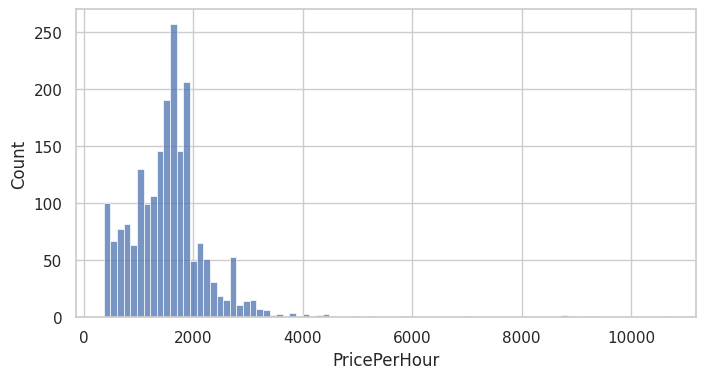

In [ ]:
data3 = flights_filled[flights_filled['Airline'] == 3]['PricePerHour']
sns.histplot(data3)

<Axes: xlabel='PricePerHour', ylabel='Count'>

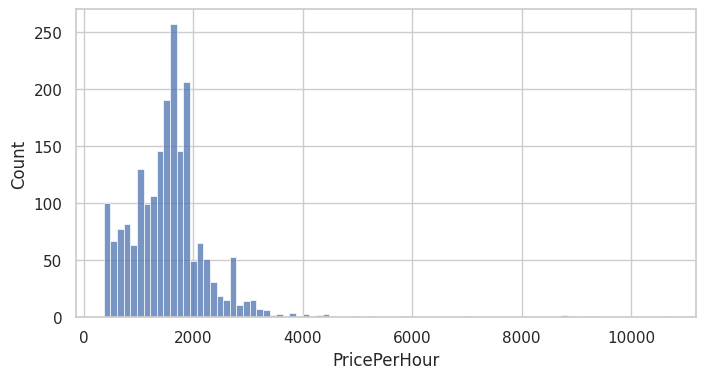

In [ ]:
data4 = flights_filled[flights_filled['Airline'] == 3]['PricePerHour']
sns.histplot(data4)

**PROJETO - PARTE 2**

1.   Escolha da coluna preço para predição

In [ ]:
# Coluna Escolhida:Price. Utilizar regressão

In [ ]:
flights_filled.head()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min,Price_dist,Price_log,DurationTotalHours,PricePerHour,PricePerHour_log,FlightType
0,3.0,0.0,5.0,0.0,3897.0,24.0,3.0,22.0,20.0,1.0,10.0,2.0,50.0,"(1758.999, 5277.0]",3.590730,2.833333,1375.411765,3.138433,Domestic
1,1.0,3.0,0.0,2.0,7662.0,1.0,5.0,5.0,50.0,13.0,15.0,7.0,25.0,"(5277.0, 8372.0]",3.884342,7.416667,1033.078652,3.014133,International
2,4.0,2.0,1.0,2.0,13882.0,9.0,6.0,9.0,25.0,4.0,25.0,19.0,0.0,"(12373.0, 79512.0]",4.142452,19.000000,730.631579,2.863698,International
3,3.0,3.0,0.0,1.0,6218.0,12.0,5.0,18.0,5.0,23.0,30.0,5.0,25.0,"(5277.0, 8372.0]",3.793651,5.416667,1147.938462,3.059919,International
4,3.0,0.0,5.0,1.0,13302.0,1.0,3.0,16.0,50.0,21.0,35.0,4.0,45.0,"(12373.0, 79512.0]",4.123917,4.750000,2800.421053,3.447223,International


In [ ]:
#Previsão de Tarifas Internacionais com apenas 1 parada
InternationalOneStopFlights =flights_filled[ (flights_filled.Total_Stops == 1 ) & (flights_filled.FlightType == 'International')&(flights_filled.Price < 20000)]
InternationalOneStopFlights.head()


,Airline,Source,Destination,Total_Stops,Price,Date,Month,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min,Price_dist,Price_log,DurationTotalHours,PricePerHour,PricePerHour_log,FlightType
3,3.0,3.0,0.0,1.0,6218.000000,12.0,5.0,18.0,5.0,23.0,30.0,5.0,25.0,"(5277.0, 8372.0]",3.793651,5.416667,1147.938462,3.059919,International
4,3.0,0.0,5.0,1.0,13302.000000,1.0,3.0,16.0,50.0,21.0,35.0,4.0,45.0,"(12373.0, 79512.0]",4.123917,4.750000,2800.421053,3.447223,International
6,4.0,0.0,5.0,1.0,13803.223415,12.0,3.0,18.0,55.0,10.0,25.0,15.0,30.0,"(12373.0, 79512.0]",4.139981,15.500000,890.530543,2.949649,International
8,4.0,0.0,5.0,1.0,11087.000000,12.0,3.0,8.0,55.0,10.0,25.0,25.0,30.0,"(8372.0, 12373.0]",4.044814,25.500000,434.784314,2.638274,International
9,6.0,2.0,1.0,1.0,8625.000000,27.0,5.0,11.0,25.0,19.0,15.0,7.0,50.0,"(8372.0, 12373.0]",3.935759,7.833333,1101.063830,3.041812,International


In [ ]:
len(InternationalOneStopFlights)

5526

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns; sns.set()
import pandas as pd
import numpy as np

import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

from matplotlib import rcParams
rcParams['figure.figsize'] = (8, 4)
rcParams['figure.dpi'] = 100
rcParams['font.size'] = 8
rcParams['font.family'] = 'sans-serif'
rcParams['lines.linewidth'] = 2.0

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
*#from sklearn.linear_model import LinearRegression
#model = LinearRegression(fit_intercept=True)

#x = InternationalOneStopFlights['DurationTotalHours'].values
#y = InternationalOneStopFlights['Price'].values
#model.fit(x[:, np.newaxis], y)

#xfit = np.linspace(0, 10, 1000)
#yfit = model.predict(xfit[:, np.newaxis])

#plt.scatter(x, y)
#plt.plot(xfit, yfit, 'r--');

SyntaxError: invalid syntax (<ipython-input-491-234625197e34>, line 1)

In [ ]:
#print("Model inclinação:      {:.3f}".format(model.coef_[0]))
#print("Model intercepto:     {:.3f}".format(model.intercept_))

Model inclinação:      89.960
Model intercepto:     9361.463


In [ ]:
#statsmodels
x = InternationalOneStopFlights['DurationTotalHours'].values
y = InternationalOneStopFlights['Price'].values
X = sm.add_constant(x)
model = sm.OLS(y, X)
results = model.fit()

In [ ]:
print("Model slope:      {:.3f}".format(results.params[1]))
print("Model intercept: {:.3f}".format(results.params[0]))

Model slope:      91.211
Model intercept: 9084.703


In [ ]:
l1 = lambda x: 89.960*x + 9361.463

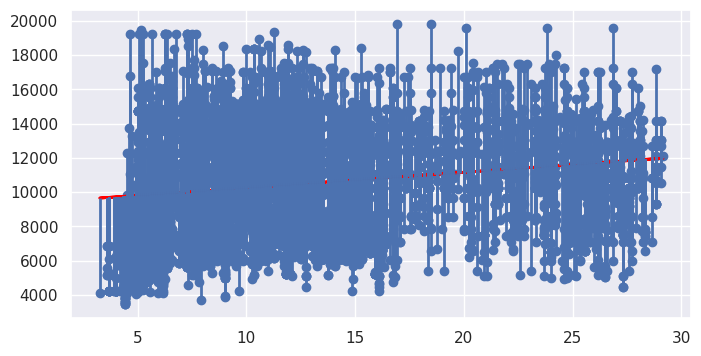

In [ ]:
fig, ax = plt.subplots()
ax.plot(x,l1(x), color='red')
ax.scatter(x,y)
ax.vlines(x,y,l1(x))

In [ ]:
#calculo do erro
conc = np.concatenate((x.reshape(len(x),-1),\
                       y.reshape(len(y),-1),\
                       l1(x).reshape(len(l1(x)),-1),\
                       ((l1(x)-y)**2).reshape(len((l1(x)-y)**2),-1)), axis=-1)

df_l = pd.DataFrame(conc, columns=['x','y','L1', '(y-L1)²'])

In [ ]:
df_l.head()

,x,y,L1,(y-L1)²
0,5.416667,6218.000000,9848.746333,1.318232e+07
1,4.750000,13302.000000,9788.773000,1.234276e+07
2,15.500000,13803.223415,10755.843000,9.286527e+06
3,25.500000,11087.000000,11655.443000,3.231274e+05
4,7.833333,8625.000000,10066.149667,2.076912e+06


In [ ]:
print('Resíduo L1 = {:.3f}'.format(df_l.iloc[:,3].sum()))

Resíduo L1 = 59859736105.844


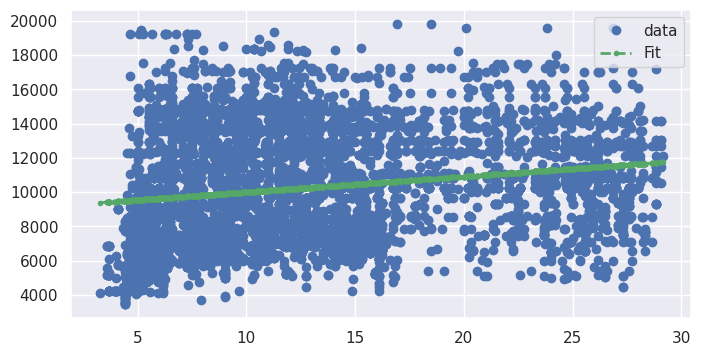

In [ ]:
prstd = wls_prediction_std(results)

figs, ax = plt.subplots(1,1)

ax.plot(x, y, 'o', label="data")
ax.plot(np.sort(x), results.fittedvalues[x.argsort()], 'g--.', label="Fit")
ax.legend(loc='best');

In [ ]:
#Avaliando o desempenho do modelo
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error

In [ ]:
print(r2_score(y, l1(x)))
print(mean_squared_error(y, l1(x)))
print(mean_absolute_percentage_error(y, l1(x)))

0.026667303060039615
10832380.764720194
0.3213218021416854


In [ ]:
InternationalOneStopFlights.to_csv('InternationalOneStopFlights.csv')

In [ ]:
#Regressão Linear Múltipla
from sklearn.ensemble import RandomForestRegressor

In [ ]:
inter = pd.read_csv('InternationalOneStopFlights.csv')
dataset = pd.DataFrame(inter, columns=inter.columns)
dataset['Price'] = inter.Price


In [ ]:
dataset.head()

,Unnamed: 0,Airline,Source,Destination,Total_Stops,Price,Date,Month,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min,Price_dist,Price_log,DurationTotalHours,PricePerHour,PricePerHour_log,FlightType
0,3,3.0,3.0,0.0,1.0,6218.000000,12.0,5.0,18.0,5.0,23.0,30.0,5.0,25.0,"(5277.0, 8372.0]",3.793651,5.416667,1147.938462,3.059919,International
1,4,3.0,0.0,5.0,1.0,13302.000000,1.0,3.0,16.0,50.0,21.0,35.0,4.0,45.0,"(12373.0, 79512.0]",4.123917,4.750000,2800.421053,3.447223,International
2,6,4.0,0.0,5.0,1.0,13803.223415,12.0,3.0,18.0,55.0,10.0,25.0,15.0,30.0,"(12373.0, 79512.0]",4.139981,15.500000,890.530543,2.949649,International
3,8,4.0,0.0,5.0,1.0,11087.000000,12.0,3.0,8.0,55.0,10.0,25.0,25.0,30.0,"(8372.0, 12373.0]",4.044814,25.500000,434.784314,2.638274,International
4,9,6.0,2.0,1.0,1.0,8625.000000,27.0,5.0,11.0,25.0,19.0,15.0,7.0,50.0,"(8372.0, 12373.0]",3.935759,7.833333,1101.063830,3.041812,International


In [ ]:
dataset['FlightType'] = dataset['FlightType'].astype('category')


In [ ]:
dataset.dtypes

Unnamed: 0               int64
Airline                float64
Source                 float64
Destination            float64
Total_Stops            float64
Price                  float64
Date                   float64
Month                  float64
Dep_hours              float64
Dep_min                float64
Arrival_hours          float64
Arrival_min            float64
Duration_hours         float64
Duration_min           float64
Price_dist              object
Price_log              float64
DurationTotalHours     float64
PricePerHour           float64
PricePerHour_log       float64
FlightType            category
dtype: object

In [ ]:
dataset.head()

,Unnamed: 0,Airline,Source,Destination,Total_Stops,Price,Date,Month,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min,Price_dist,Price_log,DurationTotalHours,PricePerHour,FlightType
0,3,3.0,3.0,0.0,1.0,6218.000000,12.0,5.0,18.0,5.0,23.0,30.0,5.0,25.0,"(5277.0, 8372.0]",3.793651,5.416667,1147.938462,International
1,4,3.0,0.0,5.0,1.0,13302.000000,1.0,3.0,16.0,50.0,21.0,35.0,4.0,45.0,"(12373.0, 79512.0]",4.123917,4.750000,2800.421053,International
2,6,4.0,0.0,5.0,1.0,13803.223415,12.0,3.0,18.0,55.0,10.0,25.0,15.0,30.0,"(12373.0, 79512.0]",4.139981,15.500000,890.530543,International
3,8,4.0,0.0,5.0,1.0,11087.000000,12.0,3.0,8.0,55.0,10.0,25.0,25.0,30.0,"(8372.0, 12373.0]",4.044814,25.500000,434.784314,International
4,9,6.0,2.0,1.0,1.0,8625.000000,27.0,5.0,11.0,25.0,19.0,15.0,7.0,50.0,"(8372.0, 12373.0]",3.935759,7.833333,1101.063830,International


In [ ]:
datasetl = dataset.drop(["Price_dist"], axis = 1)

In [ ]:
datasetl.dtypes

Unnamed: 0               int64
Airline                float64
Source                 float64
Destination            float64
Total_Stops            float64
Price                  float64
Date                   float64
Month                  float64
Dep_hours              float64
Dep_min                float64
Arrival_hours          float64
Arrival_min            float64
Duration_hours         float64
Duration_min           float64
Price_log              float64
DurationTotalHours     float64
PricePerHour           float64
FlightType            category
dtype: object

In [ ]:
datasetl['FlightType'] = datasetl['FlightType'].cat.codes

In [ ]:
datasetl.dtypes

Unnamed: 0              int64
Airline               float64
Source                float64
Destination           float64
Total_Stops           float64
Price                 float64
Date                  float64
Month                 float64
Dep_hours             float64
Dep_min               float64
Arrival_hours         float64
Arrival_min           float64
Duration_hours        float64
Duration_min          float64
Price_log             float64
DurationTotalHours    float64
PricePerHour          float64
FlightType               int8
dtype: object

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(datasetl.iloc[:, 0:17], dataset[['Price']])

print('y = {:.3f} {:+.3f}x1 {:+.3f}x2 {:+.3f}x3 {:+.3f}x4 {:+.3f}x5 {:+.3f}x6\
           {:+.3f}x7 {:+.3f}x8 {:+.3f}x9 {:+.3f}x10 {:+.3f}x11 {:+.3f}x12 {:+.3f}x13 {:+.3f}x14 {:+.3f}x15 {:+.3f}x16 {:+.3f}x17'\
           .format(model.intercept_[0], model.coef_[0,0], model.coef_[0,1], model.coef_[0,2], model.coef_[0,3], model.coef_[0,4]\
                   , model.coef_[0,5], model.coef_[0,6], model.coef_[0,7], model.coef_[0,8], model.coef_[0,9]\
                   , model.coef_[0,10], model.coef_[0,11], model.coef_[0,12], model.coef_[0,13], model.coef_[0,14], model.coef_[0,15], model.coef_[0,16]))

y = 0.000 +0.000x1 -0.000x2 +0.000x3 +0.000x4 -0.000x5 +1.000x6           -0.000x7 +0.000x8 -0.000x9 +0.000x10 +0.000x11 -0.000x12 -0.000x13 -0.000x14 +0.000x15 -0.000x16 -0.000x17


R2:      1.000
MSE:     0.000
MAPE:     0.000


<Axes: ylabel='Price'>

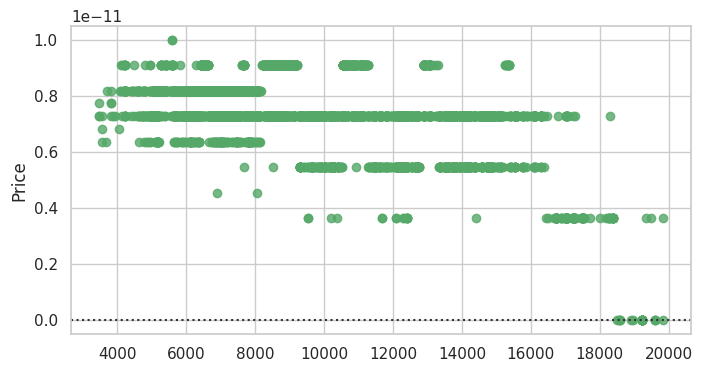

In [ ]:
predict = model.predict(datasetl.iloc[:, 0:17])

mse = mean_squared_error(datasetl[['Price']], predict)
r2 = r2_score(datasetl[['Price']], predict)
mape = mean_absolute_percentage_error(datasetl[['Price']], predict)

print("R2:      {:.3f}".format(r2))
print("MSE:     {:.3f}".format(mse))
print("MAPE:     {:.3f}".format(mape))

sns.set(style="whitegrid")
sns.residplot(x=predict, y= datasetl['Price'],  color="g")


<Axes: xlabel='DurationTotalHours', ylabel='Price'>

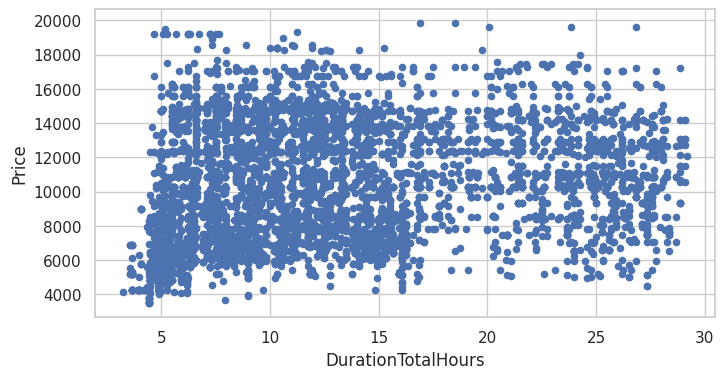

In [ ]:

datasetl[['DurationTotalHours','Price']].plot.scatter(x='DurationTotalHours',y='Price')

In [ ]:
dataset.head()

,Unnamed: 0,Airline,Source,Destination,Total_Stops,Price,Date,Month,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min,Price_dist,Price_log,DurationTotalHours,PricePerHour,PricePerHour_log,FlightType
0,3,3.0,3.0,0.0,1.0,6218.000000,12.0,5.0,18.0,5.0,23.0,30.0,5.0,25.0,"(5277.0, 8372.0]",3.793651,5.416667,1147.938462,3.059919,International
1,4,3.0,0.0,5.0,1.0,13302.000000,1.0,3.0,16.0,50.0,21.0,35.0,4.0,45.0,"(12373.0, 79512.0]",4.123917,4.750000,2800.421053,3.447223,International
2,6,4.0,0.0,5.0,1.0,13803.223415,12.0,3.0,18.0,55.0,10.0,25.0,15.0,30.0,"(12373.0, 79512.0]",4.139981,15.500000,890.530543,2.949649,International
3,8,4.0,0.0,5.0,1.0,11087.000000,12.0,3.0,8.0,55.0,10.0,25.0,25.0,30.0,"(8372.0, 12373.0]",4.044814,25.500000,434.784314,2.638274,International
4,9,6.0,2.0,1.0,1.0,8625.000000,27.0,5.0,11.0,25.0,19.0,15.0,7.0,50.0,"(8372.0, 12373.0]",3.935759,7.833333,1101.063830,3.041812,International


In [ ]:
#RANDOM FOREST PARA REGRESSÃO
from sklearn.ensemble import RandomForestRegressor
datasetforest = datasetl

([<matplotlib.axis.XTick at 0x7d2d33f8bfd0>,
 [Text(1, 0, 'Unnamed: 0'),
  Text(2, 0, 'Airline'),
  Text(3, 0, 'Source'),
  Text(4, 0, 'Destination'),
  Text(5, 0, 'Total_Stops'),
  Text(6, 0, 'Price'),
  Text(7, 0, 'Date'),
  Text(8, 0, 'Month'),
  Text(9, 0, 'Dep_hours'),
  Text(10, 0, 'Dep_min'),
  Text(11, 0, 'Arrival_hours'),
  Text(12, 0, 'Arrival_min'),
  Text(13, 0, 'Duration_hours'),
  Text(14, 0, 'Duration_min'),
  Text(15, 0, 'Price_log'),
  Text(16, 0, 'DurationTotalHours'),
  Text(17, 0, 'PricePerHour'),
  Text(18, 0, 'FlightType')])

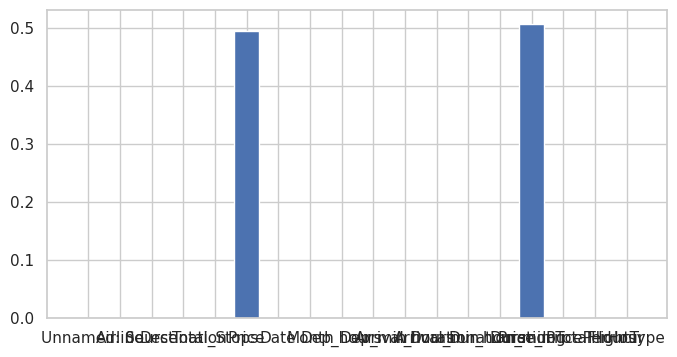

In [ ]:
regr = RandomForestRegressor()
regr.fit(datasetforest.iloc[:, 0:18].values, datasetforest[['Price']].values.reshape(datasetforest[['Price']].shape[0],))

plt.bar(np.arange(1, 19), regr.feature_importances_)
plt.xticks(np.arange(1, 19), datasetforest.columns)

R2:      1.000
MSE:     13.831
MAPE:     0.000


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


<Axes: ylabel='Price'>

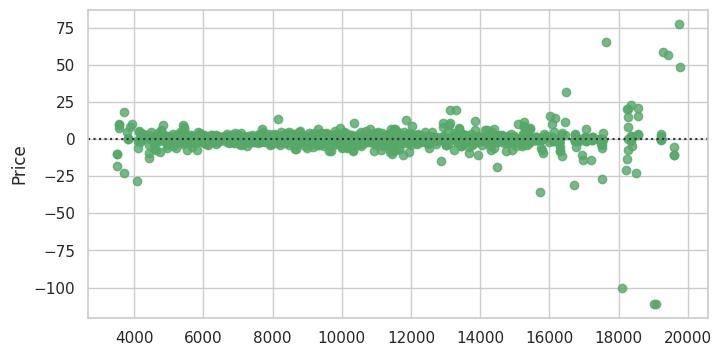

In [ ]:
predict = regr.predict(datasetforest.iloc[:, 0:18])

mse = mean_squared_error(datasetforest[['Price']], predict)
r2 = r2_score(datasetforest[['Price']], predict)
mape = mean_absolute_percentage_error(datasetforest[['Price']], predict)

print("R2:      {:.3f}".format(r2))
print("MSE:     {:.3f}".format(mse))
print("MAPE:     {:.3f}".format(mape))

sns.set(style="whitegrid")
sns.residplot(x=predict, y= datasetforest['Price'],  color="g")


In [ ]:
#X  = InternationalOneStopFlights['DurationTotalHours'].values
#y = InternationalOneStopFlights['Price'].values
# criação do holdout: divide em treinamento e teste


In [ ]:
InternationalOneStopFlights.to_csv('InternationalOneStopFlights.csv')

In [ ]:
#Forma 1 de Classificação
import numpy as np
import pandas as pd
#flightsclass=pd.read_csv("https://raw.githubusercontent.com/JessicaAero/Intro-CD/main/flightdata_dataset_2019-CD-Proj.csv?token=GHSAT0AAAAAACUSFPZPCQDS3L6LVKQIC2EQZUNUZWA", encoding = "ISO-8859-1")
flightsclass = pd.read_csv('InternationalOneStopFlights.csv')

In [ ]:
flightsclass.head()

,Unnamed: 0,Airline,Source,Destination,Total_Stops,Price,Date,Month,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min,Price_dist,Price_log,DurationTotalHours,PricePerHour,PricePerHour_log,FlightType
0,3,3.0,3.0,0.0,1.0,6218.000000,12.0,5.0,18.0,5.0,23.0,30.0,5.0,25.0,"(5277.0, 8372.0]",3.793651,5.416667,1147.938462,3.059919,International
1,4,3.0,0.0,5.0,1.0,13302.000000,1.0,3.0,16.0,50.0,21.0,35.0,4.0,45.0,"(12373.0, 79512.0]",4.123917,4.750000,2800.421053,3.447223,International
2,6,4.0,0.0,5.0,1.0,13803.223415,12.0,3.0,18.0,55.0,10.0,25.0,15.0,30.0,"(12373.0, 79512.0]",4.139981,15.500000,890.530543,2.949649,International
3,8,4.0,0.0,5.0,1.0,11087.000000,12.0,3.0,8.0,55.0,10.0,25.0,25.0,30.0,"(8372.0, 12373.0]",4.044814,25.500000,434.784314,2.638274,International
4,9,6.0,2.0,1.0,1.0,8625.000000,27.0,5.0,11.0,25.0,19.0,15.0,7.0,50.0,"(8372.0, 12373.0]",3.935759,7.833333,1101.063830,3.041812,International


In [ ]:
flightsclass.dtypes

Unnamed: 0              int64
Airline               float64
Source                float64
Destination           float64
Total_Stops           float64
Price                 float64
Date                  float64
Month                 float64
Dep_hours             float64
Dep_min               float64
Arrival_hours         float64
Arrival_min           float64
Duration_hours        float64
Duration_min          float64
Price_dist             object
Price_log             float64
DurationTotalHours    float64
PricePerHour          float64
PricePerHour_log      float64
FlightType             object
dtype: object

In [ ]:
X_flightclass = flightsclass1.drop('Total_Stops', axis=1)
y_flightclass = flightsclass1['Total_Stops']
Xtrain, Xtest, ytrain, ytest = train_test_split(X_flightclass, y_flightclass,
                                                random_state=1)

In [ ]:
flightsclass.head()

,Unnamed: 0,Airline,Source,Destination,Total_Stops,Price,Date,Month,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min,Price_dist,Price_log,DurationTotalHours,PricePerHour,PricePerHour_log,FlightType
0,3,3.0,3.0,0.0,1.0,6218.000000,12.0,5.0,18.0,5.0,23.0,30.0,5.0,25.0,"(5277.0, 8372.0]",3.793651,5.416667,1147.938462,3.059919,International
1,4,3.0,0.0,5.0,1.0,13302.000000,1.0,3.0,16.0,50.0,21.0,35.0,4.0,45.0,"(12373.0, 79512.0]",4.123917,4.750000,2800.421053,3.447223,International
2,6,4.0,0.0,5.0,1.0,13803.223415,12.0,3.0,18.0,55.0,10.0,25.0,15.0,30.0,"(12373.0, 79512.0]",4.139981,15.500000,890.530543,2.949649,International
3,8,4.0,0.0,5.0,1.0,11087.000000,12.0,3.0,8.0,55.0,10.0,25.0,25.0,30.0,"(8372.0, 12373.0]",4.044814,25.500000,434.784314,2.638274,International
4,9,6.0,2.0,1.0,1.0,8625.000000,27.0,5.0,11.0,25.0,19.0,15.0,7.0,50.0,"(8372.0, 12373.0]",3.935759,7.833333,1101.063830,3.041812,International


In [ ]:
from sklearn.naive_bayes import GaussianNB # 1. escolha da técnica
model = GaussianNB()                       # 2. instanciação do modelo
model.fit(Xtrain, ytrain)                  # 3. criação do modelo
y_model = model.predict(Xtest)             # 4. predição em novos dados

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8807822489657766

In [ ]:
#Forma 2 de Classificação
import numpy as np
import pandas as pd
#flightsclass2=pd.read_csv("https://raw.githubusercontent.com/JessicaAero/Intro-CD/main/flightdata_dataset_2019-CD-Proj.csv?token=GHSAT0AAAAAACUSFPZOGUYKKJFQR47DLMKEZUNVICA", encoding = "ISO-8859-1")
flightsclass2 = pd.read_csv('InternationalOneStopFlights.csv')

In [ ]:
flightsclass2.head()

,Unnamed: 0,Airline,Source,Destination,Total_Stops,Price,Date,Month,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min,Price_dist,Price_log,DurationTotalHours,PricePerHour,PricePerHour_log,FlightType
0,3,3.0,3.0,0.0,1.0,6218.000000,12.0,5.0,18.0,5.0,23.0,30.0,5.0,25.0,"(5277.0, 8372.0]",3.793651,5.416667,1147.938462,3.059919,International
1,4,3.0,0.0,5.0,1.0,13302.000000,1.0,3.0,16.0,50.0,21.0,35.0,4.0,45.0,"(12373.0, 79512.0]",4.123917,4.750000,2800.421053,3.447223,International
2,6,4.0,0.0,5.0,1.0,13803.223415,12.0,3.0,18.0,55.0,10.0,25.0,15.0,30.0,"(12373.0, 79512.0]",4.139981,15.500000,890.530543,2.949649,International
3,8,4.0,0.0,5.0,1.0,11087.000000,12.0,3.0,8.0,55.0,10.0,25.0,25.0,30.0,"(8372.0, 12373.0]",4.044814,25.500000,434.784314,2.638274,International
4,9,6.0,2.0,1.0,1.0,8625.000000,27.0,5.0,11.0,25.0,19.0,15.0,7.0,50.0,"(8372.0, 12373.0]",3.935759,7.833333,1101.063830,3.041812,International


In [ ]:
flightsclass2.dtypes

Unnamed: 0              int64
Airline               float64
Source                float64
Destination           float64
Total_Stops           float64
Price                 float64
Date                  float64
Month                 float64
Dep_hours             float64
Dep_min               float64
Arrival_hours         float64
Arrival_min           float64
Duration_hours        float64
Duration_min          float64
Price_dist             object
Price_log             float64
DurationTotalHours    float64
PricePerHour          float64
PricePerHour_log      float64
FlightType             object
dtype: object

In [ ]:
X  = flightsclass3
y = flightsclass3['Price'].values

# criação do holdout: divide em treinamento e teste


In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)
ypred_train = model.predict(Xtrain)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
print("ACC TRAINING:" + str(accuracy_score(ytrain, ypred_train)))
print("ACC TEST:" + str(accuracy_score(ytest, y_model)))

ACC TRAINING:1.0
ACC TEST:0.8341481760060173


In [ ]:
InternationalOneStopFlights.to_csv('InternationalOneStopFlights.csv')

In [ ]:
dados_novos = pd.read_csv('InternationalOneStopFlights.csv')
dados_novos.head()

,Unnamed: 0,Airline,Source,Destination,Total_Stops,Price,Date,Month,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min,Price_dist,Price_log,DurationTotalHours,PricePerHour,PricePerHour_log,FlightType
0,3,3.0,3.0,0.0,1.0,6218.000000,12.0,5.0,18.0,5.0,23.0,30.0,5.0,25.0,"(5277.0, 8372.0]",3.793651,5.416667,1147.938462,3.059919,International
1,4,3.0,0.0,5.0,1.0,13302.000000,1.0,3.0,16.0,50.0,21.0,35.0,4.0,45.0,"(12373.0, 79512.0]",4.123917,4.750000,2800.421053,3.447223,International
2,6,4.0,0.0,5.0,1.0,13803.223415,12.0,3.0,18.0,55.0,10.0,25.0,15.0,30.0,"(12373.0, 79512.0]",4.139981,15.500000,890.530543,2.949649,International
3,8,4.0,0.0,5.0,1.0,11087.000000,12.0,3.0,8.0,55.0,10.0,25.0,25.0,30.0,"(8372.0, 12373.0]",4.044814,25.500000,434.784314,2.638274,International
4,9,6.0,2.0,1.0,1.0,8625.000000,27.0,5.0,11.0,25.0,19.0,15.0,7.0,50.0,"(8372.0, 12373.0]",3.935759,7.833333,1101.063830,3.041812,International


In [ ]:
from sklearn.naive_bayes import GaussianNB # 1. escolha da técnica
model = GaussianNB()                       # 2. instanciação do modelo
model.fit(Xtrain, ytrain)                  # 3. criação do modelo
y_model = model.predict(Xtest)             # 4. predição em novos dados

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

NameError: name 'train_test_split' is not defined

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)
ypred_train = model.predict(Xtrain)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_model)

NameError: name 'y_model' is not defined

In [ ]:
#Interna = tionalOneStopFlights['Price'] = InternationalOneStopFlights.Price
dataset = pd.DataFrame(InternationalOneStopFlights, columns=InternationalOneStopFlights)
dataset['Price'] = InternationalOneStopFlights.Price

In [ ]:
InternationalOneStopFlights.head(20)

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min,Price_dist,Price_log,DurationTotalHours,PricePerHour,PricePerHour_log,FlightType
3,3.0,3.0,0.0,1.0,6218.000000,12.0,5.0,18.0,5.0,23.0,30.0,5.0,25.0,"(5277.0, 8372.0]",3.793651,5.416667,1147.938462,3.059919,International
4,3.0,0.0,5.0,1.0,13302.000000,1.0,3.0,16.0,50.0,21.0,35.0,4.0,45.0,"(12373.0, 79512.0]",4.123917,4.750000,2800.421053,3.447223,International
6,4.0,0.0,5.0,1.0,13803.223415,12.0,3.0,18.0,55.0,10.0,25.0,15.0,30.0,"(12373.0, 79512.0]",4.139981,15.500000,890.530543,2.949649,International
8,4.0,0.0,5.0,1.0,11087.000000,12.0,3.0,8.0,55.0,10.0,25.0,25.0,30.0,"(8372.0, 12373.0]",4.044814,25.500000,434.784314,2.638274,International
9,6.0,2.0,1.0,1.0,8625.000000,27.0,5.0,11.0,25.0,19.0,15.0,7.0,50.0,"(8372.0, 12373.0]",3.935759,7.833333,1101.063830,3.041812,International
10,1.0,2.0,1.0,1.0,8907.000000,1.0,6.0,9.0,45.0,23.0,0.0,13.0,15.0,"(8372.0, 12373.0]",3.949731,13.250000,672.226415,2.827516,International
13,4.0,3.0,0.0,1.0,9663.000000,9.0,5.0,21.0,10.0,9.0,20.0,12.0,10.0,"(8372.0, 12373.0]",3.985112,12.166667,794.219178,2.899940,International
16,8.0,2.0,1.0,1.0,5830.000000,15.0,4.0,8.0,45.0,13.0,15.0,4.0,30.0,"(5277.0, 8372.0]",3.765669,4.500000,1295.555556,3.112456,International
17,4.0,2.0,1.0,1.0,10262.000000,12.0,6.0,14.0,0.0,12.0,35.0,22.0,35.0,"(8372.0, 12373.0]",4.011232,22.583333,454.405904,2.657444,International
19,4.0,2.0,1.0,1.0,12898.000492,27.0,5.0,16.0,0.0,12.0,35.0,20.0,35.0,"(12373.0, 79512.0]",4.110522,20.583333,626.623506,2.797007,International


In [ ]:
def visualize_correlation_matrix(data, hurdle = 0.0):
    R = np.corrcoef(data, rowvar=0)
    R[np.where(np.abs(R)<hurdle)] = 0.0
    heatmap = plt.pcolor(R, cmap=mpl.cm.coolwarm, alpha=0.8)
    heatmap.axes.set_frame_on(False)
    heatmap.axes.set_yticks(np.arange(R.shape[0]) + 0.5, minor=False)
    heatmap.axes.set_xticks(np.arange(R.shape[1]) + 0.5, minor=False)
    heatmap.axes.set_xticklabels(data.columns, minor=False)
    plt.xticks(rotation=90)
    heatmap.axes.set_yticklabels(data.columns, minor=False)
    plt.tick_params(axis='both', which='major', bottom='True', top='False', left = 'False', right = 'False')
    plt.colorbar()
    plt.show()

visualize_correlation_matrix(data=dataset, hurdle=0.5)

KeyboardInterrupt: 

In [ ]:
InternationalOneStopFlights.shape

(5526, 19)

In [ ]:
print(InternationalOneStopFlights.isnull().sum())

Airline               0
Source                0
Destination           0
Total_Stops           0
Price                 0
Date                  0
Month                 0
Dep_hours             0
Dep_min               0
Arrival_hours         0
Arrival_min           0
Duration_hours        0
Duration_min          0
Price_dist            0
Price_log             0
DurationTotalHours    0
PricePerHour          0
PricePerHour_log      0
FlightType            0
dtype: int64


In [ ]:
dataset.head()

3     6218.000000
4    13302.000000
6    13803.223415
8    11087.000000
9     8625.000000
Name: Price, dtype: float64

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor()
regr.fit(dataset.iloc[:, 0:13].values, dataset[['target']].values.reshape(dataset[['target']].shape[0],))

plt.bar(np.arange(1, 14), regr.feature_importances_)
plt.xticks(np.arange(1, 14), dataset.columns)

ValueError: Input X contains NaN.
RandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
from sklearn.linear_model import LinearRegression
a = dataset.loc[0:18].values
b = dataset['Price']

model = LinearRegression()
model.fit(a, b)

#model = LinearRegression()

#model.fit(dataset.iloc[0:18].values, dataset[['Price']])

#print('y = {:.3f} {:+.3f}x1 {:+.3f}x2 {:+.3f}x3 {:+.3f}x4 {:+.3f}x5 {:+.3f}x6\
#           {:+.3f}x7 {:+.3f}x8 {:+.3f}x9 {:+.3f}x10 {:+.3f}x11 {:+.3f}x12 {:+.3f}x13 {:+.3f}x14 {:+.3f}x15 {:+.3f}x16 {:+.3f}x17 {:+.3f}x18'\
#           .format(model.intercept_[0], model.coef_[0,0], model.coef_[0,1], model.coef_[0,2], model.coef_[0,3], model.coef_[0,4]\
#                   , model.coef_[0,5], model.coef_[0,6], model.coef_[0,7], model.coef_[0,8], model.coef_[0,9]\
#                   , model.coef_[0,10], model.coef_[0,11], model.coef_[0,13], model.coef_[0,14], model.coef_[0,15], model.coef_[0,16], model.coef_[0,17]))

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:

from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor()
regr.fit(InternationalOneStopFlights.iloc[:, 0:18].values, InternationalOneStopFlights[['Price']].values.reshape(InternationalOneStopFlights[['Price']].shape[0],))

plt.bar(np.arange(1, 18), regr.feature_importances_)
plt.xticks(np.arange(1, 18), InternationalOneStopFlights.columns)

TypeError: float() argument must be a string or a real number, not 'pandas._libs.interval.Interval'